In [65]:
#获取本地IP地址
import socket
hostname = socket.gethostname()
ip_address = socket.gethostbyname(hostname)
print(f"主机名: {hostname}")
print(f"IP地址: {ip_address}")
import torch # 如果pytorch安装成功即可导入
print(torch.cuda.is_available()) # 查看CUDA是否可用
print(torch.cuda.device_count()) # 查看可用的CUDA数量
print(torch.version.cuda) # 查看CUDA的版本号


主机名: DESKTOP-D93LP51
IP地址: 10.218.151.195
True
1
11.3


In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
%matplotlib inline
torch.device("cuda:0")

device(type='cuda', index=0)

In [92]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

In [93]:
data_dir = './dataset/'
train_data = datasets.MNIST(root = data_dir,train=True,download=True,transform=transform)
test_data = datasets.MNIST(root = data_dir,train=False,download=True,transform=transform)

In [94]:
train_data_mean = train_data.data.float().mean() / 255.
train_data_std = train_data.data.float().std() / 255.
print(f"MNIST 数据集的均值为 {train_data_mean:.4f}，标准差为{train_data_std:.4f}")

MNIST 数据集的均值为 0.1307，标准差为0.3081


label is :2


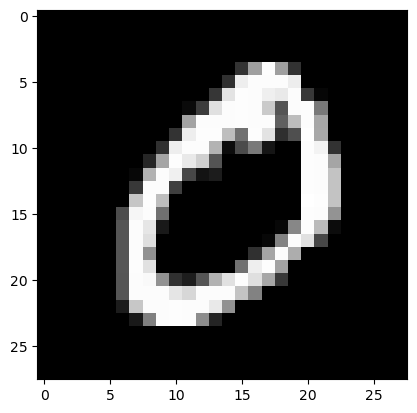

In [95]:
index = 1 
demo_pic = train_data.data[index]
plt.imshow(demo_pic,cmap='gray')
print(f'label is :{test_data.targets[index]}')

In [96]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False)
 

In [97]:
class SoftmaxModel(nn.Module):
    def __init__(self):
        super(SoftmaxModel,self).__init__()
        self.linear = nn.Linear(784,10)
    def forward(self,x):
        x = x.view(-1,784)
        out = self.linear(x)
        return out


In [100]:
def train():
    model = SoftmaxModel()
    model = model.cuda()
    learning_rate = 0.1
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(),lr = learning_rate)
    num_epochs = 15
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.
        j = 0
        for i, (images,labels) in enumerate(train_loader):
            j+=1
            images = images.cuda()
            labels = labels.cuda() 
            outputs = model(images)
            loss = criterion(outputs, labels)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss+=loss.item()
            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss:{:.4f}'.format(epoch+1,num_epochs, i+1, len(train_loader),loss.item()))
        losses.append(epoch_loss/j)
    return losses,model

In [ ]:
%time losses,model = train()

Epoch [1/15], Step [100/469], Loss:0.5872
Epoch [1/15], Step [200/469], Loss:0.4729
Epoch [1/15], Step [300/469], Loss:0.4087
Epoch [1/15], Step [400/469], Loss:0.3562
Epoch [2/15], Step [100/469], Loss:0.3108
Epoch [2/15], Step [200/469], Loss:0.3305
Epoch [2/15], Step [300/469], Loss:0.4744
Epoch [2/15], Step [400/469], Loss:0.4658
Epoch [3/15], Step [100/469], Loss:0.3094
Epoch [3/15], Step [200/469], Loss:0.3308
Epoch [3/15], Step [300/469], Loss:0.3185
Epoch [3/15], Step [400/469], Loss:0.3559
Epoch [4/15], Step [100/469], Loss:0.3107
Epoch [4/15], Step [200/469], Loss:0.2475
Epoch [4/15], Step [300/469], Loss:0.2409
Epoch [4/15], Step [400/469], Loss:0.2795
Epoch [5/15], Step [100/469], Loss:0.2542
Epoch [5/15], Step [200/469], Loss:0.3297
Epoch [5/15], Step [300/469], Loss:0.3250
Epoch [5/15], Step [400/469], Loss:0.2705
Epoch [6/15], Step [100/469], Loss:0.3203
Epoch [6/15], Step [200/469], Loss:0.3798
Epoch [6/15], Step [300/469], Loss:0.1639
Epoch [6/15], Step [400/469], Loss

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [35]:
model.cpu()
with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in test_loader:
        outputs = model(images)
        _,predicted = torch.max(outputs.data,1)
        total+=labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy on Test Set: {:.2f}%'.format(100 * correct/ total))

Accuracy on Test Set: 90.33%
